# Regularisation and Model Selection

## Loading and observation

**Question** Load the Diabetes dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes

In [29]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [33]:
diabetes['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [34]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

**Question** Build a `dataframe` from the data. Add a `target` column for the target. Display the first rows of the dataframe and display descriptive statistics.  

In [6]:
(df, target) = load_diabetes(return_X_y=True, as_frame=True)
df['target'] = target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**Question** In the documentation it is written *Note that the 10 x variables have been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)*. Check these two properties.

In [11]:
df.iloc[:,0:10].mean(axis=1)

0      0.004955
1     -0.027755
2      0.003695
3     -0.013318
4     -0.010732
         ...   
437    0.017066
438    0.012213
439   -0.002487
440   -0.000175
441    0.000016
Length: 442, dtype: float64

In [14]:
(df.iloc[:,0:10].sum(axis=1))**2

0      2.455065e-03
1      7.703662e-02
2      1.365205e-03
3      1.773622e-02
4      1.151728e-02
           ...     
437    2.912590e-02
438    1.491586e-02
439    6.186082e-04
440    3.067908e-06
441    2.458103e-08
Length: 442, dtype: float64

**Question** Draw a graph showing the target value as a function of age 

<AxesSubplot: title={'center': 'Target value as a function of age'}, xlabel='Age', ylabel='Target'>

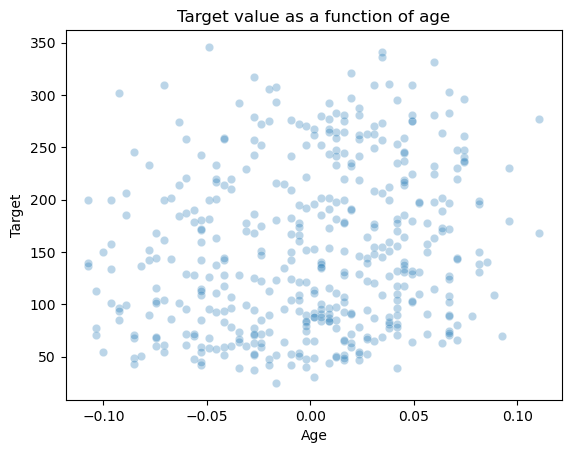

In [31]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.title("Target value as a function of age") 
plt.xlabel("Age") 
plt.ylabel("Target") 
sns.scatterplot(x =df['age'], y=df['target'], alpha=0.3) 

## First trial

**Question** Use `train_test_split` from `sklearn.model_selection` to randomly split the dataset, keeping 1/3 for the test sample.  

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:10], df['target'], test_size=0.33, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 10) (146, 10) (296,) (146,)


**Question** Check that you can do this either on the numpy arrays from the read operation performed using `load_diabetes` or on the dataframe built earlier. 

In [32]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(diabetes['data'], diabetes['target'], test_size=0.33, random_state=42)

print(X_trainB.shape, X_testB.shape, y_trainB.shape, y_testB.shape)

(296, 10) (146, 10) (296,) (146,)


In [76]:
X_train.values[[0,1,2],:]

array([[ 0.0090156 , -0.04464164, -0.03099563,  0.02187239,  0.00806271,
         0.00870687,  0.00446045, -0.00259226,  0.00943366,  0.01134862],
       [-0.00188202, -0.04464164,  0.05415152, -0.0665056 ,  0.07273249,
         0.05661859, -0.04340085,  0.08486339,  0.08449153,  0.04862759],
       [ 0.0090156 ,  0.05068012, -0.00512814, -0.06419889,  0.06998059,
         0.0838625 , -0.03971921,  0.07120998,  0.03954249,  0.01963284]])

In [77]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
231,0.009016,-0.044642,-0.030996,0.021872,0.008063,0.008707,0.004460,-0.002592,0.009434,0.011349
325,-0.001882,-0.044642,0.054152,-0.066506,0.072732,0.056619,-0.043401,0.084863,0.084492,0.048628
193,0.009016,0.050680,-0.005128,-0.064199,0.069981,0.083863,-0.039719,0.071210,0.039542,0.019633
109,0.038076,0.050680,-0.009439,0.002351,0.001183,0.037517,-0.054446,0.050176,-0.025953,0.106617
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [73]:
X_train.iloc[:1,:]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
231,0.009016,-0.044642,-0.030996,0.021872,0.008063,0.008707,0.00446,-0.002592,0.009434,0.011349


Whatever the method you choose, we need 4 **numpy arrays** `X_train`, `X_test`, `y_train`, `y_test` for the following questions.

**Question** Have a look at the `Ridge` documentation in sklearn. What is the objective function? What is its derivative in matrix form? For what value of $w$ does it cancel? 

*Answer* 
* Objective function : $||y - Xw||^2_2 + alpha * ||w||^2_2$*



* Derivative in matrix form : $ ||y - Xw||^2 + alpha * ||w||^2 :$

 $SSR = ||y — Xw||^2 $
 
 $SSR = (y — Xw)^T(y — Xw)$
 $= (y^T — (Xw)^T)(y — Xw)$
 $= y^Ty — y^TXw — (Xw)^Ty + (Xw)^TXw$
 $= y^Ty — y^TXw — w^TX^Ty + w^TX^TXw$
 $= y^Ty — 2y^TXw + w^TX^TXw$
 
 Differentiate the objective function with respect to w:

$ d/dw (SSR + alpha * ||w||^2) = 0$
 
$ d/dw ((y^Ty — 2y^TXw + w^TX^TXw) + (alpha * ||w||²)) = 0$
 
$ = -2y^TX + 2X^TXw + 2alpha * w = 0 $

* Value of w it cancels out : $ -2y^TX + 2X^TXw + 2alpha * w = 0$

$2X^TXw + 2alpha * w = 2y^TX$

$(X^TX + alpha * I)w = X^Ty$

$w = inv(X^TX + alpha * I) * X^Ty$

**Question** Build two regression models with `sklearn`. Use the two methods `LinearRegression` and `Ridge`. First, set `alpha` to 1. Call them `lr` and `ridge`.

In [36]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

**Question** Calculate the predictions and scores in each case on the test data.

In [39]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5103942572821252

In [40]:
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.4445111375735453

**Question** Plot on the same graph the blue points for ridge and the red points for lr, representing test values on the x-axis and predicted values on the y-axis.

![ridge contre lr](./ridge_contre_lr.png)


[]

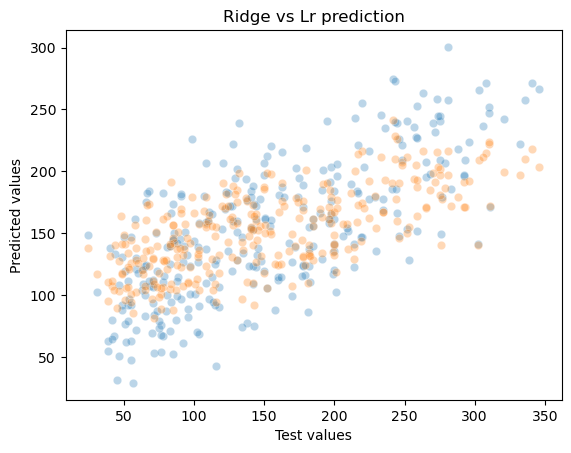

In [47]:
plt.title("Ridge vs Lr prediction") 
plt.xlabel("Test values") 
plt.ylabel("Predicted values") 
sns.scatterplot(x = y_train, y = lr.predict(X_train), alpha=0.3) 
sns.scatterplot(x = y_train, y = ridge.predict(X_train), alpha=0.3) 

plt.plot()

## Model selection methodology

**Question** Can we say from what we've observed on the test that one is better than the other, and that we should take the method that performs better on the test sample and put it into production?

*Answer* : The lr score is better than the ridge score, so for now we can say lr is better than ridge.


But we've set a default $\alpha$ parameter for ridge regression and how can we test whether other values would work better? We need to test many values, and we want to find the best value for $\alpha$. How do we go about this? 

To do this, **we need to split the initial train data sample into a training part (train) and a validation part (valid)**. We estimate the error on the validation part. 

We then have 3 train/validation/test sets (or train/development/test according to other terminologies), the middle one being used to tune the values of the (hyper)parameters of the learning algorithm (not the parameters of the regression function): this is **hyperparameter tuning**.

## Cross Validation

But we're starting to get rather small sets... Estimation on a small valid sample is likely to be problematic. We then use a method known as cross-validation to repeat the train/valid split several times and average the results.

Let's build this by hand first... We'll proceed by manipulating **indices**, not data.

**Question** Let us consider a list of indices

    indices = np.arange(10)


Now take a look at how the `random.shuffle`, `copy`, `array_split`, `pop` and `concatenate` methods of `np`. Experiment with `indices` to see how it works.   

    indices = np.arange(10)
    np.random.shuffle(indices)
    l = np.array_split(indices, 3)
    l_old = l.copy()
    print(l)
    print(l.pop(1))
    print(l)
    print(np.concatenate(l))
    print(l_old)

In [52]:
indices = np.arange(10)
np.random.shuffle(indices)
print(indices)
l = np.array_split(indices, 3)
l_old = l.copy()
print(l)
print(l.pop(1))
print(l)
print(np.concatenate(l))
print(l_old)

[5 7 8 9 3 0 2 4 1 6]
[array([5, 7, 8, 9]), array([3, 0, 2]), array([4, 1, 6])]
[3 0 2]
[array([5, 7, 8, 9]), array([4, 1, 6])]
[5 7 8 9 4 1 6]
[array([5, 7, 8, 9]), array([3, 0, 2]), array([4, 1, 6])]


If we cut the set of randomly reordered indices of the train into three parts, we obtain three parts and we can successively build samples from the train which will be : 

- indices from parts 1 and 2 to learn, and 3 to evaluate the score 
- indices from parts 1 and 3 to learn, and 2 to evaluate the score 
- indices from parts 2 and 3 to learn, and 1 to evaluate the score 

We can then calculate an estimate of the error by averaging the 3 scores corresponding to the three steps above. This is the cross-validation algorithm. Of course, you can generalize to as many parts as you like! 

**Question** Implement this algorithm in a function `my_fold` whose parameters are a sample `X`, classes `y`, a number of parts `k` and a regression method `reg`. Try it out with `ridge`.

In [87]:
def my_fold(X, y, k, reg):
    score = 0
    l = X.shape[0] #number of samples or rows
    
    indices = np.arange(l)
    np.random.shuffle(indices)
    indices_splits = np.array_split(indices, k)
    #print(f"Split indices list: {indices_splits}") 
    
    for i in range(k):
        print(f"loop {i}")
        indices_splits_copy = indices_splits.copy()
        indices_val = indices_splits_copy.pop(i)
        indices_train = np.concatenate(indices_splits_copy)
        
        X_train = X[indices_train,:]
        y_train = y[indices_train]
        
        X_val = X[indices_val,:]
        y_val = y[indices_val]
              
        reg.fit(X_train, y_train)
        score_i = reg.score(X_val, y_val)
        print(f"score {score_i}")
        score += score_i
        
    return score/k

In [88]:
ridge = Ridge(alpha =1)
my_fold(X_train.values, y_train.values, 3, ridge)

loop 0
score 0.3954931088570812
loop 1
score 0.31335385278299743
loop 2
score 0.3350080191776077


0.3479516602725621

### Cross validation with sklearn

**Question** 
Look at and import [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), then create an object named `k_fold` with 3 parts. Use the [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) description page as inspiration for this question.

In [89]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3)

**Question** Build a list of `ridge` scores.  

In [93]:
scores= []

for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    ridge.fit(X_train.values[train_index], y_train.values[train_index]) 
    score_i = ridge.score(X_train.values[test_index], y_train.values[test_index])
    scores.append(score_i)
scores

[0.29473635808602905, 0.4022070884963972, 0.2850512292080851]

An even more direct way is to use the function [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). 

**Question** Import the function and with a loop, calculate the errors per 3-folds of `ridge` for the following `alpha` values 0.01, 0.1, 1, 10, 100.

In [98]:
from sklearn.model_selection import cross_val_score

alpha = [0.01, 0.1, 1, 10, 100]

for a in alpha:
    ridge = Ridge(a)
    print(f"For alpha = {a}:")
    print(cross_val_score(ridge, X_train.values, y_train.values, cv=3))

For alpha = 0.01:
[0.41181123 0.56141288 0.34548576]
For alpha = 0.1:
[0.41095867 0.55739143 0.3631145 ]
For alpha = 1:
[0.29473636 0.40220709 0.28505123]
For alpha = 10:
[0.0667179  0.09738561 0.04964807]
For alpha = 100:
[-0.01335405  0.00948116 -0.03143949]


## Even more simple...

**Question**: Use [sklearn.linear_model.RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)...

In [99]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=3).fit(X_train, y_train)
clf.score(X_train, y_train)

0.5026424926951543